## K-Means clustering for COURSERA PROJECT
### Banknote authentication
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns



In [2]:
# read Banknote.csv and stored in pandas dataframe
file_to_read="Banknote.csv"
df_banknote=pd.read_csv(file_to_read)


### Find nulls values and duplicate

In [3]:
print("Values before: ", df_banknote.shape)
df_banknote= df_banknote.drop_duplicates()
print("Values after: ", df_banknote.shape)
#null values
missing_data = df_banknote.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 



#### Describe dataset  

In [6]:
df_banknote.describe() #statistical describe dataset

,V1,V2
count,1348.000000,1348.000000
mean,0.445785,1.909039
std,2.862906,5.868600
min,-7.042100,-13.773100
25%,-1.786650,-1.627000
50%,0.518735,2.334150
75%,2.853250,6.796025
max,6.824800,12.951600


#### Statistics value from non_normalized dataset

dimensions of Banknote Authentications dataset array: 2  
total number of elements of the array: 2696 
data types:  float64 
 number of elements stored along each dimension of the array:  (1348, 2) 
 Arithmetic mean:  [0.44578485 1.9090393 ] 
 standard deviation:  4.673094631405544 
 Covariance:  4.581034666715847


(array([ 27.,   3.,  11.,  26.,  32.,  68.,  64.,  56.,  47.,  66., 155.,
        111., 166.,  81.,  67.,  95.,  96., 103.,  54.,  20.]),
 array([-13.7731  , -12.436865, -11.10063 ,  -9.764395,  -8.42816 ,
         -7.091925,  -5.75569 ,  -4.419455,  -3.08322 ,  -1.746985,
         -0.41075 ,   0.925485,   2.26172 ,   3.597955,   4.93419 ,
          6.270425,   7.60666 ,   8.942895,  10.27913 ,  11.615365,
         12.9516  ]),
 <BarContainer object of 20 artists>)

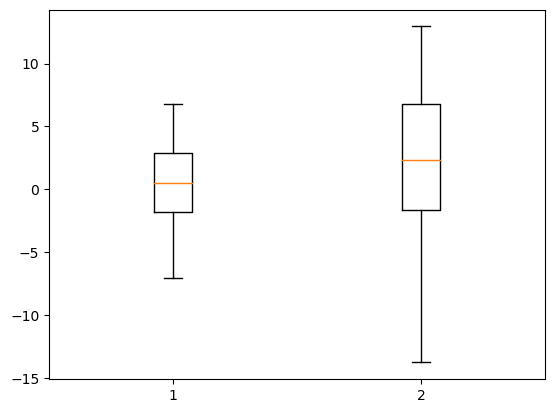

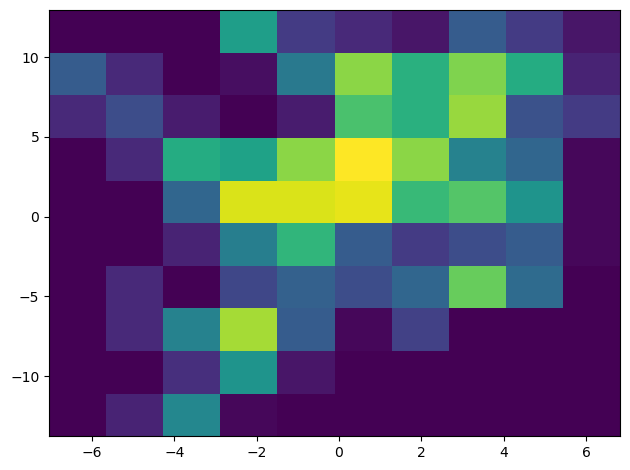

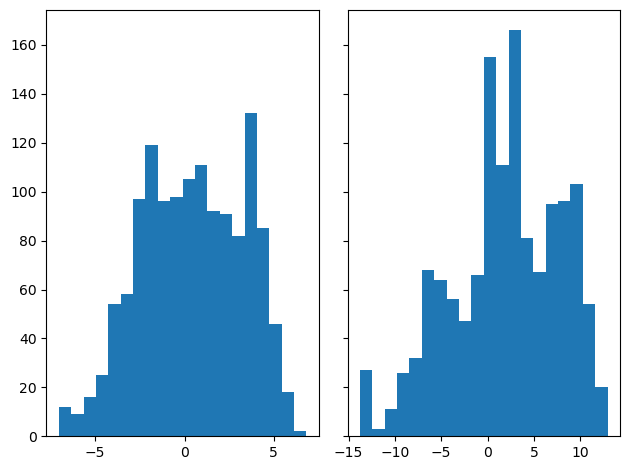

In [7]:
#find statistics values from the dataset
from scipy import stats
from scipy import ndimage

# create numpy array
values=np.array(df_banknote)

# arithmetic mean
mean_bank=np.mean(values, axis=0)

# covariance

cov_bank=np.cov(values[:,0], values[:,1], bias=True)[0][1]


# standard deviation
std_bank= ndimage.standard_deviation(values)

print ("dimensions of Banknote Authentications dataset array:", 
        values.ndim, " \ntotal number of elements of the array:", values.size,
        "\ndata types: " , values.dtype,
        "\n number of elements stored along each dimension of the array: ",
         values.shape,
         "\n Arithmetic mean: ", mean_bank,
         "\n standard deviation: ", std_bank,
         "\n Covariance: ", cov_bank)
plt.boxplot(values)

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(values[:,0], values[:,1])

N_points = 100000
n_bins = 20

# Generate two normal distributions
dist1 =values[:,0]
dist2 = values[:,1]

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)




## Statistics z-scores with Scipy

Text(4.2168708353715146e-17, 4.2168708353715146e-17, 'Mean s=10000')

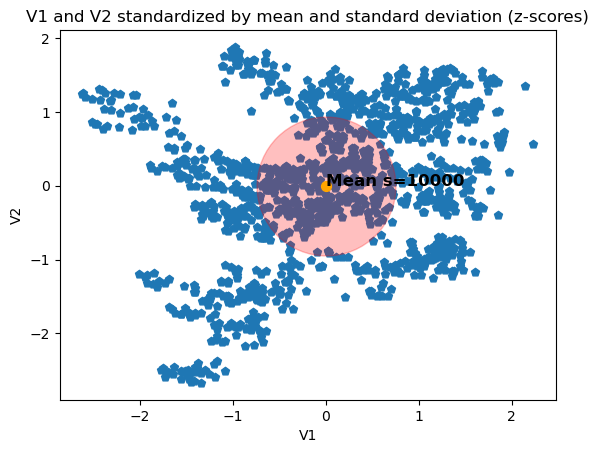

In [8]:
#normalizing with z-scores usin scipy 
from scipy import stats
from scipy import ndimage
from matplotlib import markers

# create numpy array
values=np.array(df_banknote)

# Zscores V1 (x)=( V1(x) - V1 mean) / V1 std
zscore_bank=stats.zscore(values)

# arithmetic mean
mean_zscore_bank=np.mean(zscore_bank, axis=0)


#plot scatter with values and mean
plt.scatter(zscore_bank[:,0],zscore_bank[:,1], marker="p")
plt.scatter(mean_zscore_bank[0], mean_zscore_bank[1] , color="red", s=10000, alpha=0.25 )
plt.scatter(mean_zscore_bank[0], mean_zscore_bank[1] , color="orange", s=50 )
plt.xlabel("V1")
plt.ylabel("V2")
plt.title ("V1 and V2 standardized by mean and standard deviation (z-scores)")
plt.text(mean_zscore_bank[0], mean_zscore_bank[1], "Mean s=10000", color="black", size="large", weight="bold", ha="left")


####normalized data with min-max method, there are negative values

In [9]:

min_data=np.min(df_banknote,0)
max_data=np.max(df_banknote,0)
normed_data=(df_banknote- min_data)/ (max_data- min_data)
normed_data.head()

,V1,V2
0,0.769004,0.839643
1,0.835659,0.820982
2,0.786629,0.416648
3,0.757105,0.871699
4,0.531578,0.348662


If V1 and V2 have a lineal relationship, the slope and intersect are:  [0.55933447 1.65969647]
Correlation in dataset: 
           V1        V2
V1  1.000000  0.272863
V2  0.272863  1.000000


<Axes: xlabel='V1', ylabel='V2'>

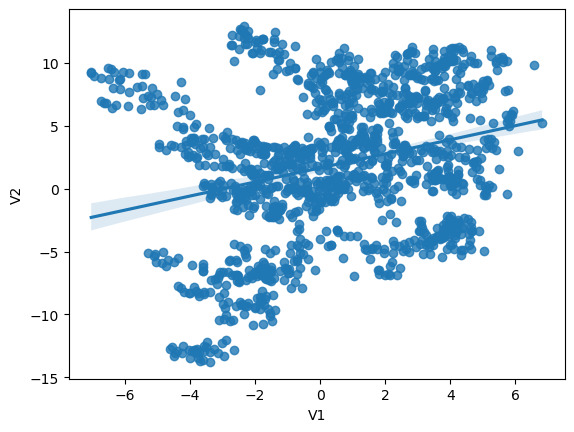

In [11]:
import seaborn as sns
data_X=df_banknote["V1"]
data_Y=df_banknote["V2"]
slope_intercept=np.polyfit(data_X, data_Y, 1)
print("If V1 and V2 have a lineal relationship, the slope and intersect are: ", slope_intercept)
print("Correlation in dataset: \n" ,df_banknote.corr())
sns.regplot(x="V1", y="V2", data=df_banknote)

```python
Correlation in dataset: 
           V1        V2
V1  1.000000  0.264026
V2  0.264026  1.000000
The correlation between V1 and V2 is week
```

Text(0, 0.5, 'V1')

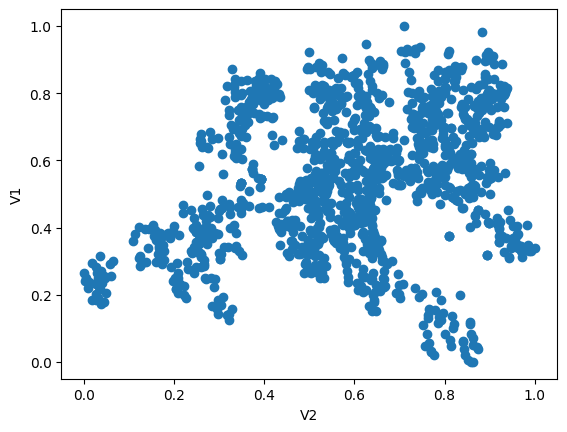

In [8]:
normed_data.sort_values("V2", inplace=True)
plt.scatter(normed_data["V2"],normed_data["V1"])
plt.xlabel("V2")
plt.ylabel("V1")

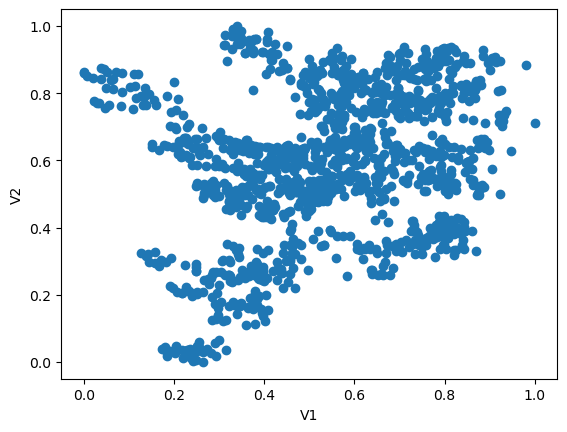

In [14]:
normed_data.sort_values("V1", inplace=True)
plt.scatter(normed_data["V1"], normed_data["V2"])
plt.xlabel("V1")
plt.ylabel("V2")
plt.show()

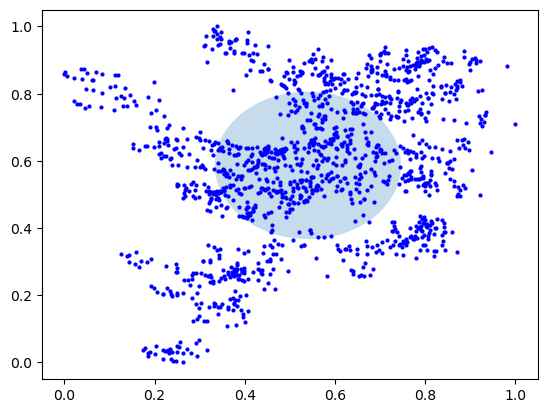

In [15]:
from matplotlib.patches import Ellipse

scatter_V1=normed_data["V1"]
scatter_V2=normed_data["V2"]

mean_V1=np.mean(normed_data["V1"])
mean_V2=np.mean(normed_data["V2"])

std_V1=(np.std(normed_data["V1"]) * 2)
std_V2=(np.std(normed_data["V2"]) * 2)


e=Ellipse(xy=(mean_V1, mean_V2), width=std_V1, height= std_V2 , angle=0, alpha=0.25)

fig,graph =plt.subplots()

graph.add_artist(e)

graph.scatter(scatter_V1, scatter_V2, c="blue", s=4)

plt.show()

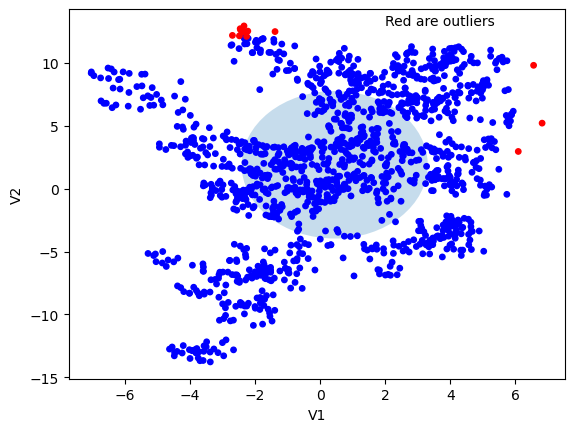

In [57]:
from matplotlib.patches import Ellipse

scatter_V1=df_banknote["V1"]
scatter_V2=df_banknote["V2"]

mean_V1=np.mean(df_banknote["V1"])
mean_V2=np.mean(df_banknote["V2"])

std_V1=(np.std(df_banknote["V1"]) * 2)
std_V2=(np.std(df_banknote["V2"]) * 2)

# define region
color=np.where ((scatter_V2 > 12) | (scatter_V1 > 6), "red", "blue")


e=Ellipse(xy=(mean_V1, mean_V2), width=std_V1, height= std_V2 , angle=0, alpha=0.25)
fig,graph =plt.subplots()
graph.add_artist(e)
graph.scatter(scatter_V1, scatter_V2, c=color, s=15)
plt.xlabel("V1")
plt.ylabel("V2")
plt.text(2,13, "Red are outliers")
plt.show()